## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import Template
import datetime
import warnings
%matplotlib inline

# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

df = pd.read_csv("tmdb-movies.csv")

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [3]:
print("The row number of the dataset is {0}.\n \bThe column number of the dataset is {1}".format(*df.shape))

The row number of the dataset is 10866.
 The column number of the dataset is 21


In [4]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
df.sample(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8534,20762,tt0117774,0.541018,0,0,The Substitute,Tom Berenger|Raymond Cruz|Marc Anthony|William...,NaN,Robert Mandel,NaN,...,"After he did some jobs for CIA, ex-marine John...",114,Action|Thriller,Live Entertainment,4/19/96,28,5.9,1996,0.0,0.0
5808,157117,tt2306745,0.277349,0,0,Sound City,Trent Reznor|Tom Petty|Mick Fleetwood|Dave Gro...,http://www.soundcitymovie.com,Dave Grohl,That board. That room. That is Sound City.,...,The history of Sound City and their huge recor...,106,Documentary|Music,Roswell Films|Therapy Content,1/18/13,64,7.5,2013,0.0,0.0


In [8]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
type_count = Template("There are $count types in the dataset")
print(type_count.substitute(count=len(df.dtypes.value_counts().to_dict())))

There are 3 types in the dataset


In [10]:
type_dict = {}
for key, value in zip(["object", "int", "float"], df.dtypes.value_counts().to_dict().items()):
    type_dict[key] = value[1]
    
all_count = Template("The object type is $object.\nThe int type is $int.\nThe float type is $float.")
print(all_count.substitute(**type_dict))

The object type is 11.
The int type is 6.
The float type is 4.


In [11]:
df.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [13]:
print("There are {} columns with missing value".format(df.isna().any().sum()))

There are 9 columns with missing value


In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [16]:
df.duplicated().sum()

1

In [12]:
# drop the duplicate data
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum(), df.shape

(id                         0
 imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7929
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64, (10865, 21))

In [14]:
# drop homepage, tagline, keywords, production_companies
df.drop(["homepage", "tagline", "keywords", "production_companies"], axis=1, inplace=True)

In [15]:
# drop the missing value by row
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [17]:
# 读取数据表中名为 id、popularity、budget、runtime、vote_average 列的数据。
df.loc[:, ["id", "popularity", "budget", "runtime", "vote_average"]]

,id,popularity,budget,runtime,vote_average
0,135397,32.985763,150000000,124,6.5
1,76341,28.419936,150000000,120,7.1
2,262500,13.112507,110000000,119,6.3
3,140607,11.173104,200000000,136,7.5
4,168259,9.335014,190000000,137,7.3
5,281957,9.110700,135000000,156,7.2
6,87101,8.654359,155000000,125,5.8
7,286217,7.667400,108000000,141,7.6
8,211672,7.404165,74000000,91,6.5
9,150540,6.326804,175000000,94,8.0


In [18]:
# 读取数据表中前1～20行以及48、49行的数据。
df.iloc[np.r_[:21, 48, 49], :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [19]:
# 读取数据表中第50～60行的 popularity 那一列的数据。
df.loc[50:60, "popularity"]

50    2.883233
51    2.814802
52    2.798017
53    2.793297
54    2.614499
55    2.584264
56    2.578919
57    2.575711
58    2.557859
59    2.550747
60    2.487849
Name: popularity, dtype: float64

---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [23]:
# extract the date
df["release_date"] = pd.to_datetime(df.release_date)

change_date = pd.Series(index=df.index)
for row in df.loc[:, ["release_date", "release_year"]].iterrows():
    if datetime.date.isocalendar(row[1][0])[0] == row[1][1]:
        change_date.loc[row[0]] = row[1][0]
    else:
        change_date.loc[row[0]] = datetime.date(
            row[1][1], int(datetime.date.isoformat(row[1][0])[5:7]), 
            int(datetime.date.isoformat(row[1][0])[-2:]))

df["release_date"] = pd.to_datetime(change_date)

In [21]:
# 读取数据表中 popularity 大于5 的所有数据。
df.query("popularity > 5")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [24]:
# 读取数据表中 popularity 大于5 的所有数据且发行年份在1996年之后的所有数据
df.query("popularity > 5 & release_year >= 1996")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [25]:
# 对 release_year 进行分组，使用 .agg 获得 revenue 的均值。
df.groupby("release_year").revenue.agg(np.mean)

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.941670e+07
1968    6.966657e+06
1969    8.131903e+06
1970    1.400555e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.766391e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.893898e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.534158e+07
1985    2.662752e+07
1986    2.502315e+07
1987    2.792020e+07
1988    2.633072e+07
1989    3.825869e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.604662e+07
1993    3.929464e+07
1994    3.856212e+07
1995    5.262265e+07
1996    4.094331e+07
1997    5.578625e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.901206e+07
2001    5.564350e+07
2002    5.546820e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.575301e+07
2006    4.028648e+07


In [26]:
# 对 director 进行分组，使用 .agg 获得 popularity 的均值，从高到低排列。
df.groupby("director").popularity.agg("mean").sort_values(ascending=False)

director
Colin Trevorrow                     16.696886
Joe Russo|Anthony Russo             12.971027
Chad Stahelski|David Leitch         11.422751
Don Hall|Chris Williams              8.691294
Juno John Lee                        8.411577
Kyle Balda|Pierre Coffin             7.404165
Alan Taylor                          6.883129
Peter Richardson                     6.668990
Pete Docter                          6.326804
Christopher Nolan                    6.195521
Alex Garland                         6.118847
Patrick Tatopoulos                   5.806897
Wes Ball                             5.553082
Dan Gilroy                           5.522641
Lilly Wachowski|Lana Wachowski       5.331930
James Gunn                           5.225378
Bob Peterson|Pete Docter             4.908902
J.J. Abrams                          4.800957
Alejandro GonzÃ¡lez IÃ±Ã¡rritu       4.793536
Roger Allers|Rob Minkoff             4.782688
Damien Chazelle                      4.780419
Morten Tyldum            

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

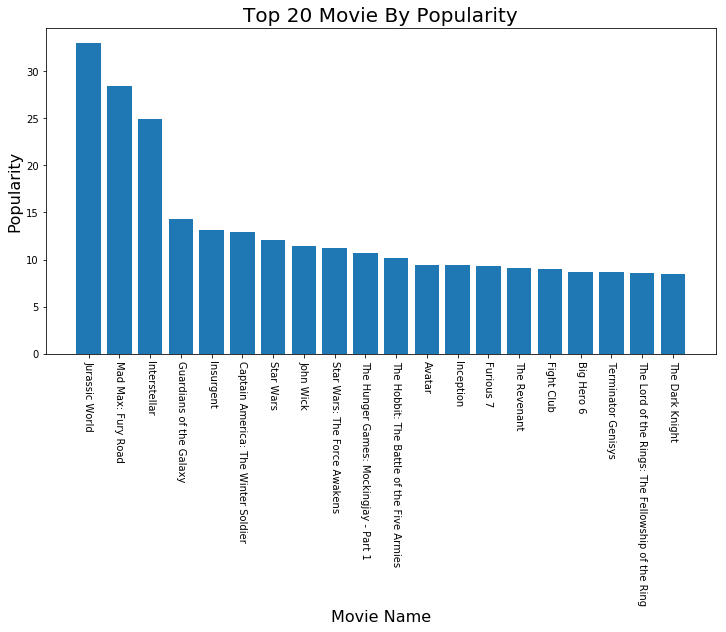

In [27]:
y = df.nlargest(20, "popularity").popularity
x = df.nlargest(20, "popularity").original_title
plt.figure(figsize=(12, 6))
ax = plt.subplot()
ax.bar(x=x, height=y)
plt.xticks(rotation=270)
ax.set_xlabel("Movie Name", fontsize=16)
ax.set_ylabel("Popularity", fontsize=16)
ax.set_title("Top 20 Movie By Popularity", fontsize=20)

plt.show()

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

In [28]:
# 分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。
df["profite"] = df["revenue"] - df["budget"]

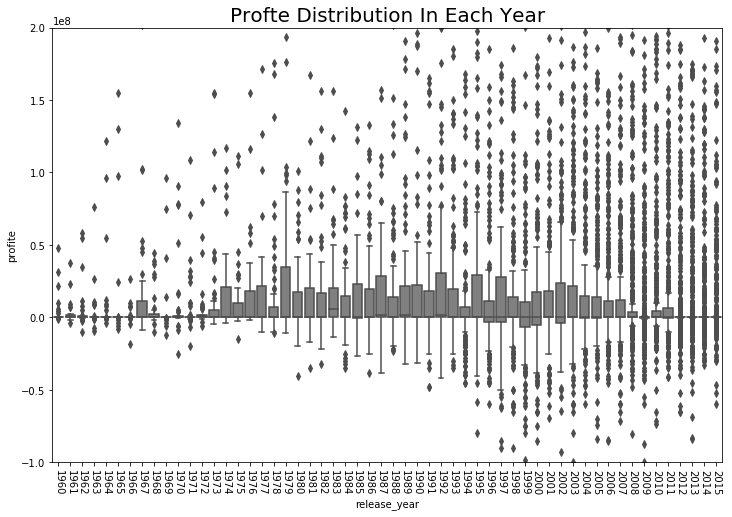

In [29]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.boxplot(x="release_year", y="profite", data=df, ax=ax, color="grey")
plt.xticks(rotation=270)
plt.ylim(-.1e9, .2e9)
plt.title("Profte Distribution In Each Year", fontsize=20)
plt.show()

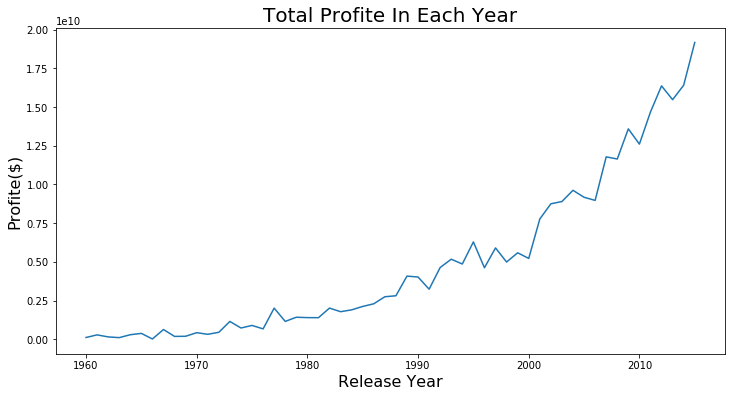

In [30]:
year_groups = df.groupby("release_year")
profite = year_groups.profite.sum()

plt.figure(figsize=(12,6))
ax = plt.subplot()
profite.plot(kind="line", ax=ax)
plt.title("Total Profite In Each Year", fontsize=20)
plt.ylabel("Profite($)", fontsize=16)
ax.set_xlabel("Release Year", fontsize=16)
plt.show()

1. 电影总体利润在逐年增加，尤其是在上世纪70年代到21世纪初的阶段
2. 2007年后，稳定获利的电影开始减少，但是某些电影的暴利是之前电影无法企及的

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

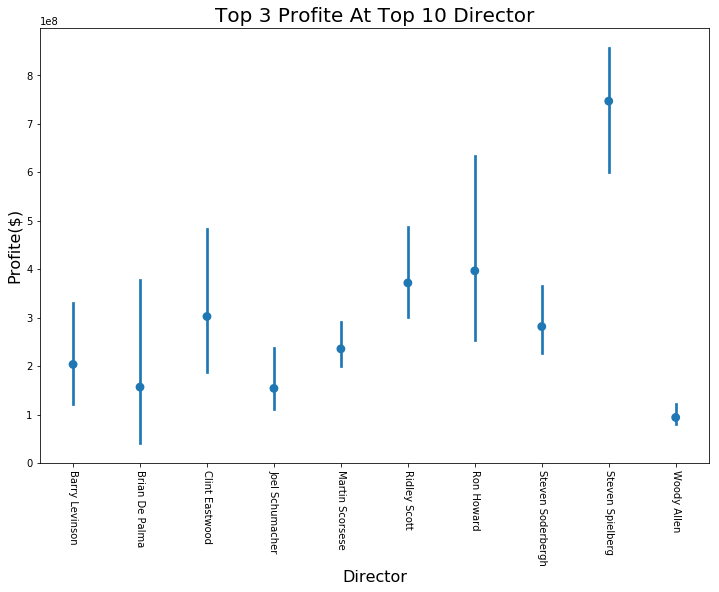

In [31]:
top10director = df.groupby("director").size().nlargest(10)

top10director_3movie = df.loc[df.director.isin(top10director.index), :].groupby("director").profite.nlargest(3).reset_index()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.pointplot( y="profite", x="director", data=df.loc[top10director_3movie.level_1, ["director", "profite", "original_title"]], ax=ax, linestyles='')

    ax.set_title("Top 3 Profite At Top 10 Director", fontsize=20)
    ax.set_xlabel("Director", fontsize=16)
    ax.set_ylabel("Profite($)", fontsize=16)
    plt.xticks(rotation=270)
    plt.show()

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

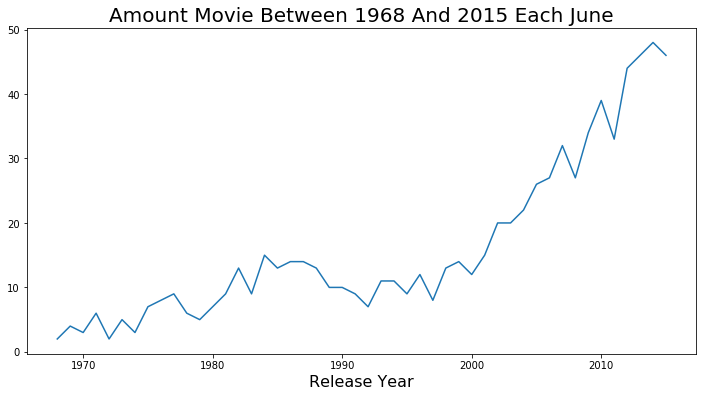

In [32]:
df["release_month"] = df.release_date.dt.month

target_data = df.query("release_year >= 1968 & release_year <= 2015 & release_month == 6").copy()


plt.figure(figsize=(12, 6))
ax = plt.subplot()
target_data.groupby("release_year").size().plot(kind="line", ax=ax)

plt.title("Amount Movie Between 1968 And 2015 Each June", fontsize=20)
plt.xlabel("Release Year", fontsize=16)
plt.show()

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

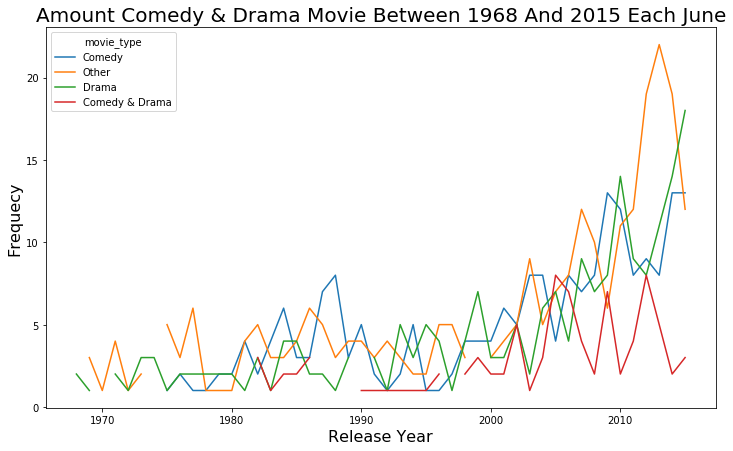

In [33]:
def select_type(x):
    if "Comedy" in x and "Drama" in x:
        return "Comedy & Drama"
    elif "Comedy" in x and "Drama" not in x:
        return "Comedy"
    elif "Comedy" not in x and "Drama" in x:
        return "Drama"
    else:
        return "Other"
    
target_data["movie_type"] = target_data.genres.apply(select_type)

plt.figure(figsize=(12, 7))
ax = plt.subplot()
target_data.groupby(["release_year", "movie_type"]).size().unstack().reset_index().plot.line(x="release_year", y=["Comedy", "Other", "Drama", "Comedy & Drama"], ax=ax)

ax.set_title("Amount Comedy & Drama Movie Between 1968 And 2015 Each June", fontsize=20)
ax.set_xlabel("Release Year", fontsize=16)
ax.set_ylabel("Frequecy", fontsize=16)

plt.show()

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。